In [7]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [1]:
from pandas_datareader import DataReader

In [2]:
from datetime import datetime

In [3]:
from __future__ import division

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-05-10 to 2017-05-09
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


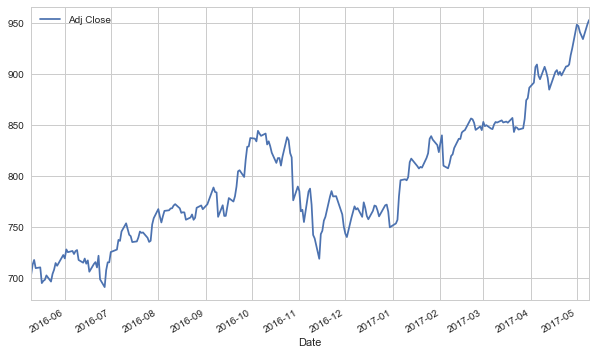

In [17]:
AMZN['Adj Close'].plot(legend=True,figsize=(10,6))

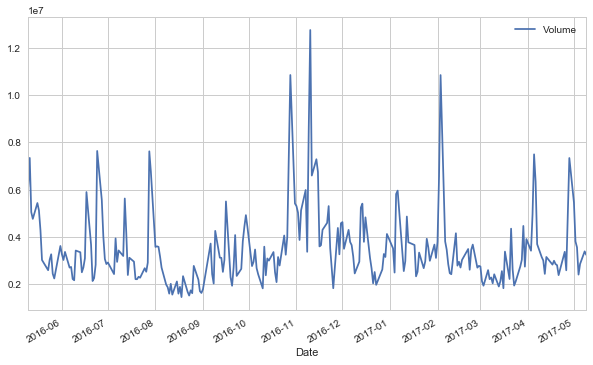

In [16]:
AMZN['Volume'].plot(legend=True,figsize=(10,6))

In [12]:
# plot of several moving averages
ma_day = [10,30,60]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name]=AMZN['Adj Close'].rolling(window = ma, center = False).mean()

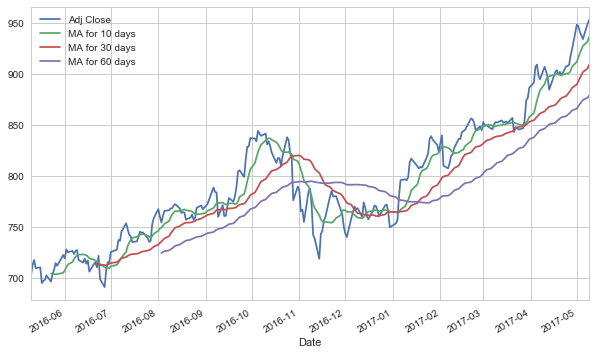

In [15]:
AMZN[['Adj Close','MA for 10 days','MA for 30 days','MA for 60 days']].plot(subplots=False,figsize=(10,6))

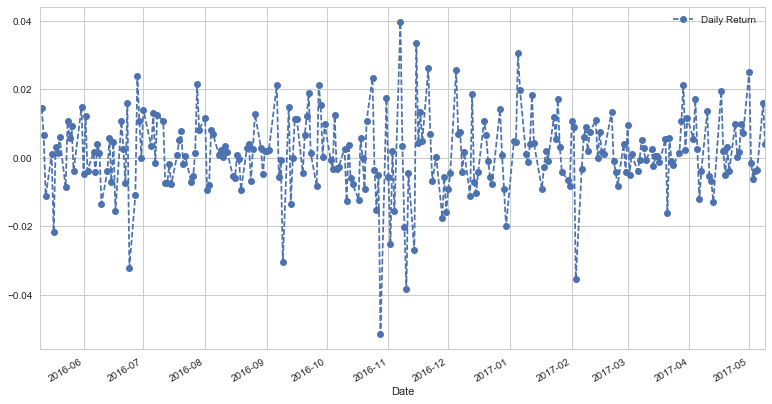

In [24]:
# pct_change to find the percent change for each day
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

AMZN['Daily Return'].plot(figsize=(13,7),legend=True,linestyle='--',marker='o')

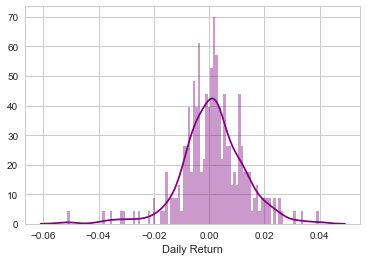

In [25]:
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='purple')

In [26]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [27]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-05-10,92.042972,703.070007,723.179993,49.712543
2016-05-11,91.146389,713.229980,715.289978,49.741774
2016-05-12,89.008370,717.929993,713.309998,50.189984
2016-05-13,89.185717,709.919983,710.830017,49.771007
2016-05-16,92.496190,710.659973,716.489990,50.501787


In [28]:
tech_rets = closing_df.pct_change()

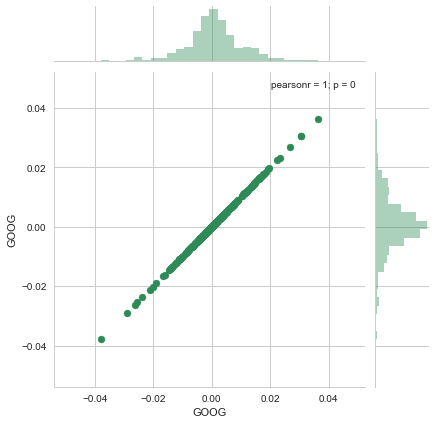

In [29]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

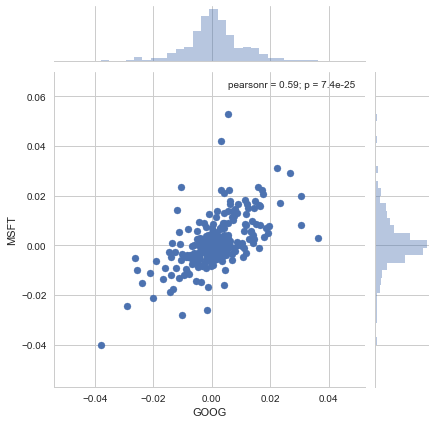

In [30]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

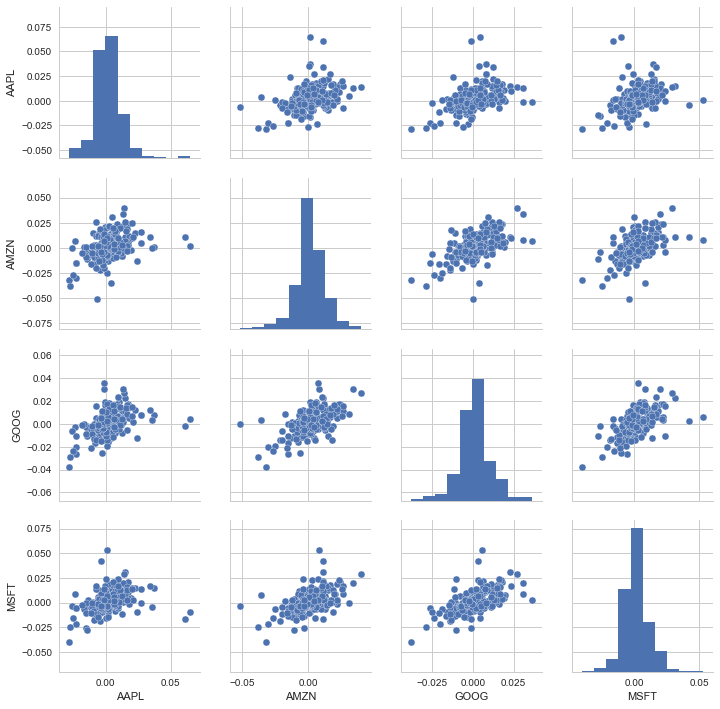

In [33]:
sns.pairplot(tech_rets.dropna())

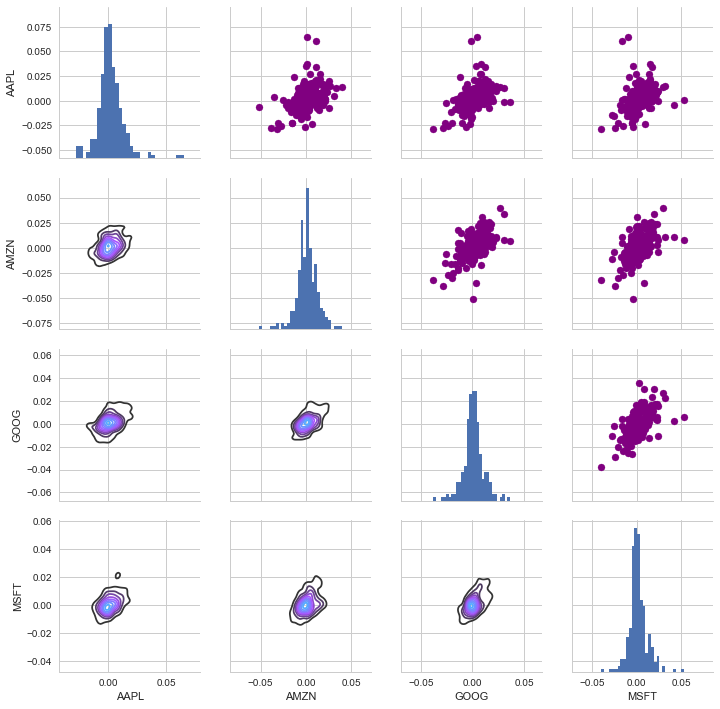

In [34]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

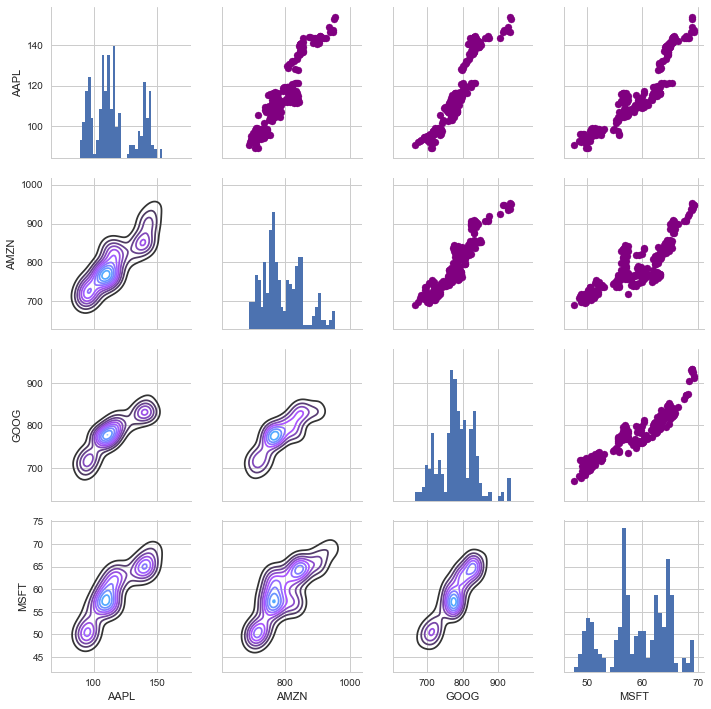

In [35]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

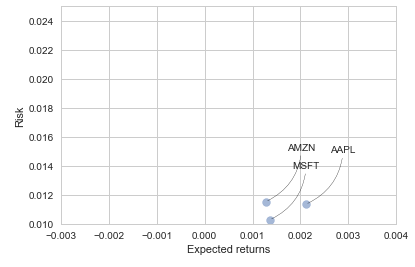

In [41]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

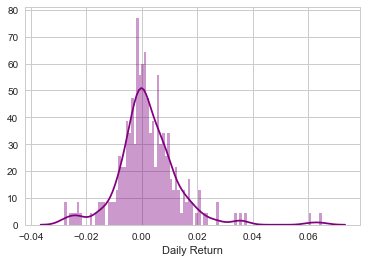

In [42]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [43]:
rets['AAPL'].quantile(0.05)

-0.014682686093512198

In [44]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [46]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [47]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-05-10,716.750000,723.500000,715.719971,723.179993,1569600,723.179993
2016-05-11,723.409973,724.479980,712.799988,715.289978,1692100,715.289978
2016-05-12,717.059998,719.250000,709.000000,713.309998,1360700,713.309998
2016-05-13,711.929993,716.661987,709.260010,710.830017,1314500,710.830017
2016-05-16,709.130005,718.479980,705.650024,716.489990,1317100,716.489990


In [48]:
start_price = 716.75

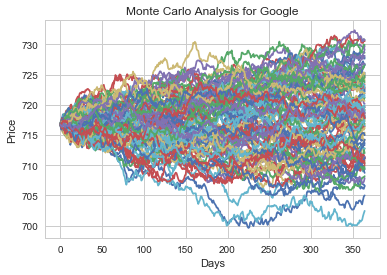

In [49]:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [50]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

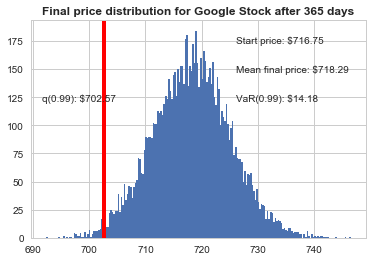

In [51]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');